### 날씨분류
> https://www.kaggle.com/datasets/ananthr1/weather-prediction

1. data - 날짜
2. precipitation - 강수량
3. temp_max - 최대 기온
4. temp_min - 최저 기온
5. wind - 풍속
6. weather - 날씨(target)

In [1]:
import pandas as pd
w_df_origin = pd.read_csv('./datasets/weather.csv')
w_df = w_df_origin.copy()
w_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [2]:
w_df_origin.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [3]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
w_df.duplicated().sum()

0

In [5]:
w_df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [6]:
# 날짜는 필요없다고 판단하여 제거
w_df = w_df.drop(labels=['date'], axis=1)
w_df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


array([[<Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'temp_max'}>],
       [<Axes: title={'center': 'temp_min'}>,
        <Axes: title={'center': 'wind'}>]], dtype=object)

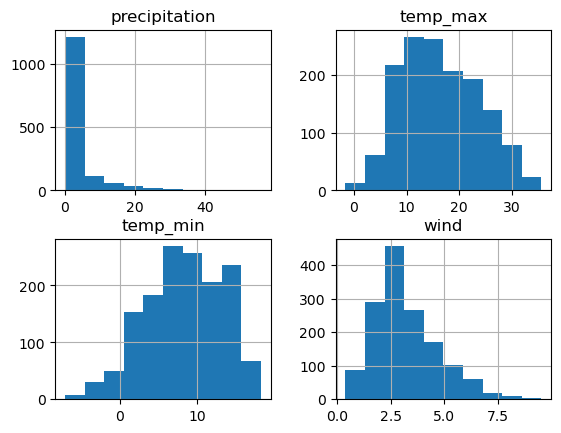

In [7]:
w_df.hist()

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

features = ['precipitation', 'temp_max', 'temp_min', 'wind']

total_count = w_df.shape[0]
for feature in features:
    std_df = std.fit_transform(w_df[[feature]])
    count = ((std_df < -1.96) | (std_df > 1.96)).sum()
    print(f'{feature}: {count}건, {np.round(count / total_count * 100, 4)}%')

precipitation: 79건, 5.4073%
temp_max: 52건, 3.5592%
temp_min: 50건, 3.4223%
wind: 74건, 5.065%


In [9]:
w_df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_w = std.fit_transform(w_df.iloc[:, :-1])

In [11]:
std_w = pd.DataFrame(std_w, columns=w_df.iloc[:, :-1].columns)
std_w['weather'] = w_df.weather
std_w

,precipitation,temp_max,temp_min,wind,weather
0,-0.453650,-0.495299,-0.644212,1.014980,drizzle
1,1.178598,-0.794731,-1.082347,0.875833,rain
2,-0.333852,-0.645015,-0.206077,-0.654780,rain
3,2.586224,-0.576962,-0.524720,1.014980,rain
4,-0.258978,-1.026111,-1.082347,1.989006,rain
...,...,...,...,...,...
1456,0.834179,-1.638585,-1.301414,-0.237340,rain
1457,-0.229029,-1.556922,-1.301414,-1.350513,rain
1458,-0.453650,-1.257490,-1.520481,-0.446060,fog
1459,-0.453650,-1.475259,-1.839125,0.110527,sun


In [12]:
# 이상치 제거
features = std_w.iloc[:, :-1]
for column in features.columns:
    std_w.drop(
        std_w[~std_w[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_w[~std_w[column].between(-1.96, 1.96)].shape[0]}건')

precipitation: 0건
temp_max: 0건
temp_min: 0건
wind: 0건


In [13]:
w_df = w_df.iloc[std_w.index].reset_index(drop=True)
w_df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,2.5,4.4,2.2,2.2,rain
4,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...
1232,0.0,4.4,0.0,2.5,sun
1233,8.6,4.4,1.7,2.9,rain
1234,1.5,5.0,1.7,1.3,rain
1235,0.0,7.2,0.6,2.6,fog


In [14]:
from sklearn.preprocessing import LabelEncoder

# 인코딩
columns = ['weather']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    w_df[column] = encoder.fit_transform(w_df[column])
    encoders[column] = encoder.classes_.tolist()

In [15]:
w_df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,2.5,4.4,2.2,2.2,2
4,0.0,7.2,2.8,2.3,2
...,...,...,...,...,...
1232,0.0,4.4,0.0,2.5,4
1233,8.6,4.4,1.7,2.9,2
1234,1.5,5.0,1.7,1.3,2
1235,0.0,7.2,0.6,2.6,1


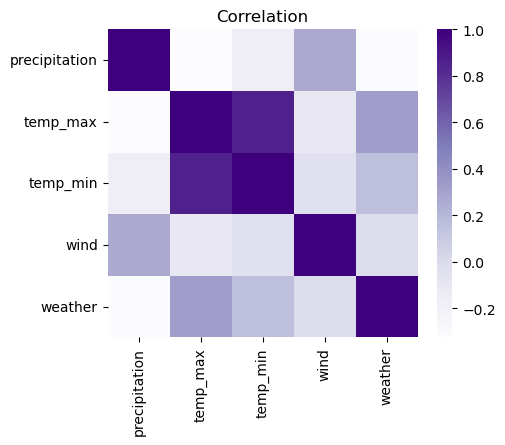

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
corr = w_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = w_df.iloc[:, :-1], w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# target피쳐의 불균형을 업샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

weather
4    448
1    448
2    448
3    448
0    448
Name: count, dtype: int64

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [20]:
# from sklearn.tree import export_graphviz

# export_graphviz(
#     dtc, 
#     out_file='./images/weather01.dot', 
#     class_names=encoders['weather'], 
#     feature_names=features.columns, 
#     impurity=True, 
#     filled=True
# )

In [21]:
# import graphviz

# with open('./images/weather01.dot') as f:
#     weather_dtc01 = f.read()

# weather_dtc01_graph = graphviz.Source(weather_dtc01)

In [22]:
# weather_dtc01_graph.render(filename='weather01', directory='./images', format='png')

<img src='./images/weather01.png'>

#### dtc

오차 행렬
[[ 2  1  0  0  6]
 [ 3  8  1  0  7]
 [ 2  1 94  5  2]
 [ 0  0  1  2  0]
 [20 21  2  0 70]]
정확도: 0.7097, 정밀도: 0.4801, 재현율: 0.5667, F1: 0.4938
################################################################################


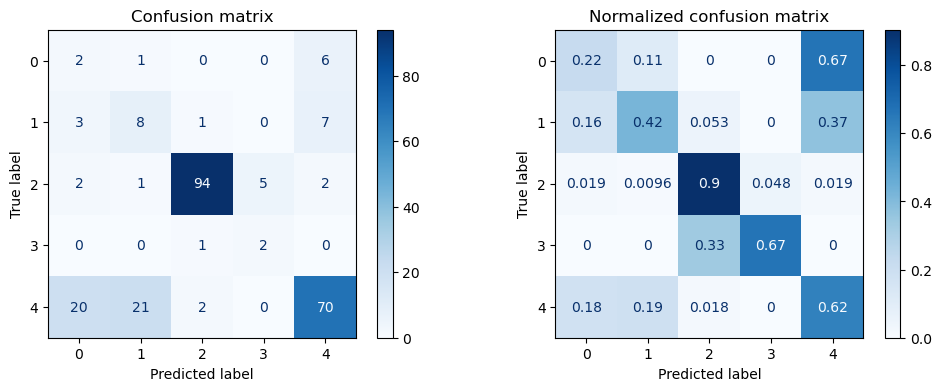

In [23]:
prediction = dtc.predict(X_test)
get_evaluation(y_test, prediction, dtc, X_test)

- 그냥 dtc의 오차행렬은 정밀도가 꽤 낮은 모습

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### 교차검증 후 dtc

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc_parameters = {'max_depth': [18, 19, 20], 'min_samples_split': [40, 41, 42]}

dtc = DecisionTreeClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [26]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [18, 19, 20],
                         'min_samples_split': [40, 41, 42]},
             return_train_score=True)

In [27]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 18, 'min_samples_split': 40}",0.732588,1
1,"{'max_depth': 18, 'min_samples_split': 41}",0.730802,8
2,"{'max_depth': 18, 'min_samples_split': 42}",0.730802,8
3,"{'max_depth': 19, 'min_samples_split': 40}",0.732142,3
4,"{'max_depth': 19, 'min_samples_split': 41}",0.731248,4
5,"{'max_depth': 19, 'min_samples_split': 42}",0.731248,4
6,"{'max_depth': 20, 'min_samples_split': 40}",0.732588,1
7,"{'max_depth': 20, 'min_samples_split': 41}",0.731248,4
8,"{'max_depth': 20, 'min_samples_split': 42}",0.731248,4


오차 행렬
[[ 2  1  0  0  6]
 [ 6  7  0  0  6]
 [ 2  1 92  5  4]
 [ 0  0  1  2  0]
 [38 29  0  0 46]]
정확도: 0.6008, 정밀도: 0.4486, 재현율: 0.5098, F1: 0.4351
################################################################################


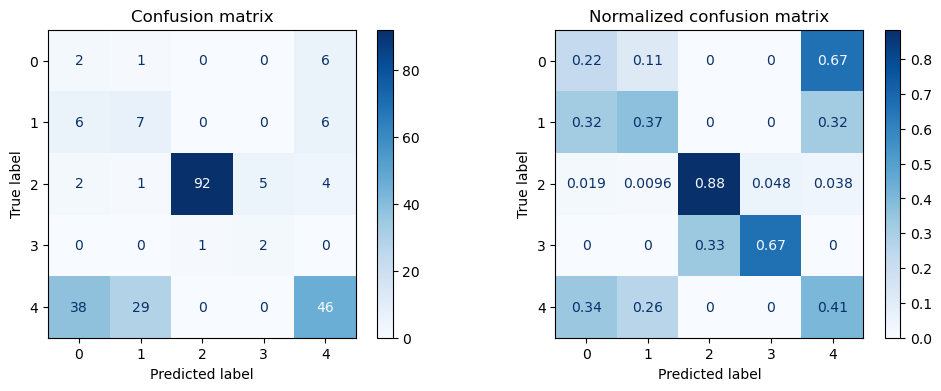

In [28]:
dtc_prediction = dtc.predict(X_test)
get_evaluation(y_test, dtc_prediction, dtc, X_test)

- 교차검증 후 오히려 전체적으로 떨어진 모습

#### knn

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [30]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])
display(knn_result_df)

knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

{'knn__n_neighbors': 9}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.731250,1
1,{'knn__n_neighbors': 5},0.706695,2
2,{'knn__n_neighbors': 7},0.701787,3
3,{'knn__n_neighbors': 9},0.687948,4
4,{'knn__n_neighbors': 11},0.679911,5


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

오차 행렬
[[ 2  1  1  0  5]
 [ 6  8  2  0  3]
 [ 7 10 70 14  3]
 [ 0  1  0  2  0]
 [29 25  9  1 49]]
정확도: 0.5282, 정밀도: 0.4022, 재현율: 0.4833, F1: 0.3689
################################################################################


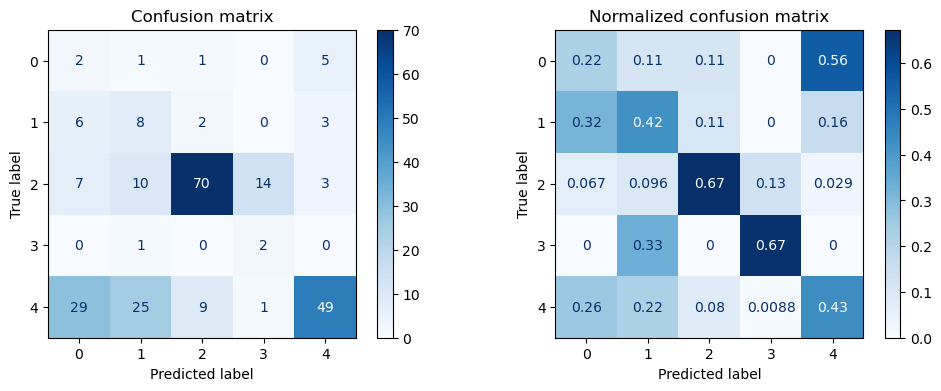

In [31]:
knn_prediction = knn_pipe.predict(X_test)
get_evaluation(y_test, knn_prediction, knn_pipe, X_test)

#### svc

In [32]:
from sklearn.svm import SVC
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear', 'rbf']}

svc = SVC(probability=True, verbose=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [33]:
g_svc.fit(X_train_over, y_train_over)

[LibSVM]

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True, verbose=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

오차 행렬
[[ 1  0  0  0  8]
 [ 5  5  2  0  7]
 [ 2  8 85  5  4]
 [ 0  0  1  2  0]
 [17 16 12  0 68]]
정확도: 0.6492, 정밀도: 0.4259, 재현율: 0.4920, F1: 0.4361
################################################################################


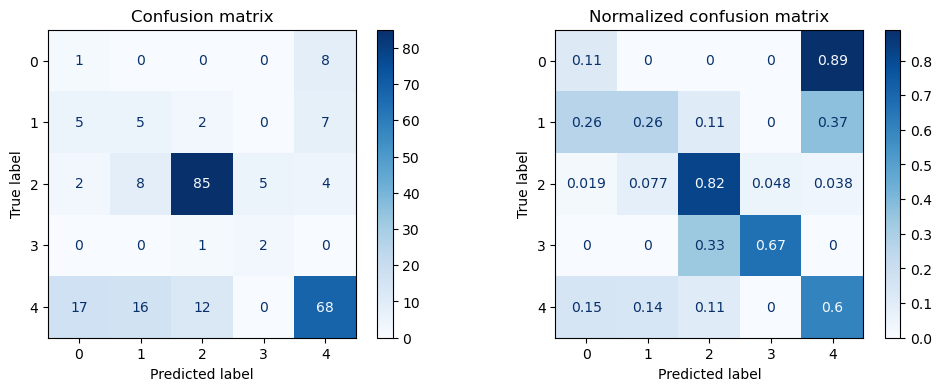

In [34]:
svc_prediction = g_svc.predict(X_test)
get_evaluation(y_test, svc_prediction, g_svc, X_test)

- 서포트벡터머신은 정확도는 올랐으나 정밀도와 재현율이 낮다

#### rfc

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [18, 19, 20], 
    'min_samples_split': [28, 29, 30]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [18, 19, 20],
                         'min_samples_split': [28, 29, 30]})

In [36]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 18, 'min_samples_split': 28}",0.800446,5
1,"{'max_depth': 18, 'min_samples_split': 29}",0.801786,3
2,"{'max_depth': 18, 'min_samples_split': 30}",0.795536,9
3,"{'max_depth': 19, 'min_samples_split': 28}",0.804911,1
4,"{'max_depth': 19, 'min_samples_split': 29}",0.801786,3
5,"{'max_depth': 19, 'min_samples_split': 30}",0.796875,7
6,"{'max_depth': 20, 'min_samples_split': 28}",0.804911,1
7,"{'max_depth': 20, 'min_samples_split': 29}",0.799554,6
8,"{'max_depth': 20, 'min_samples_split': 30}",0.796875,8


In [37]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[ 2  1  0  0  6]
 [ 4  8  0  0  7]
 [ 4  0 89  8  3]
 [ 0  0  0  3  0]
 [11 20  0  0 82]]
정확도: 0.7419, 정밀도: 0.4961, 재현율: 0.6449, F1: 0.5190
################################################################################


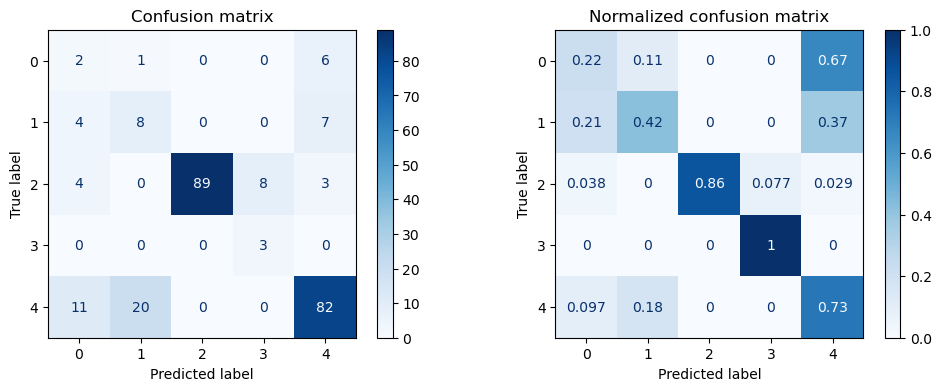

In [38]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

- 랜덤포레스트는 정밀도가 조금 낮지만 정확도와 재현율이 잘 나왔다

#### ada

In [39]:
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

adabc = AdaBoostClassifier()

g_ada = GridSearchCV(adabc, param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [40]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.312500,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.312500,9
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.343750,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.304464,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.318304,8
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.326786,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.297768,12
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.362500,2
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.375000,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.345089,3


In [41]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

오차 행렬
[[  0   0   8   0   1]
 [  1   1  15   0   2]
 [  2   1  98   2   1]
 [  0   0   2   1   0]
 [  0   6 102   0   5]]
정확도: 0.4234, 정밀도: 0.2899, 재현율: 0.2745, F1: 0.2170
################################################################################


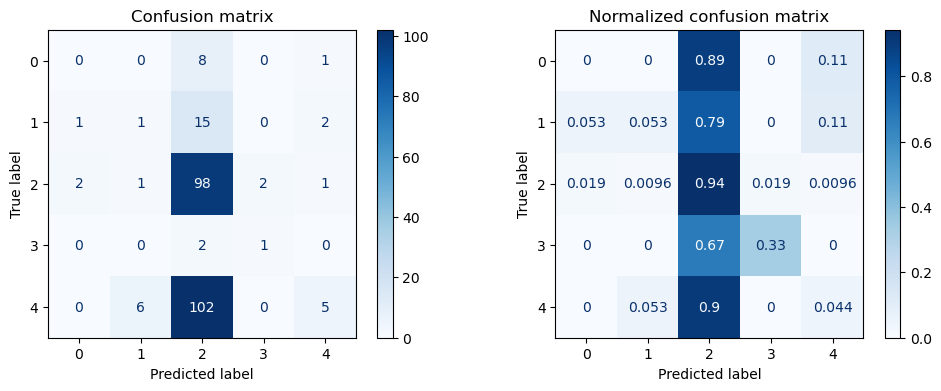

In [42]:
get_evaluation(y_test, ada_prediction, ada, X_test)

- Ada는 쉽지않다

#### gbc

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [44]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.805357,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.819643,8
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.825893,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.823214,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.828571,1
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.821875,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.822321,5
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.820982,7
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.825893,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.647768,10


In [45]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[  1   0   0   0   8]
 [  5   5   1   0   8]
 [  2   0  94   5   3]
 [  0   0   1   2   0]
 [  4   8   1   0 100]]
정확도: 0.8145, 정밀도: 0.5126, 재현율: 0.5659, F1: 0.5210
################################################################################


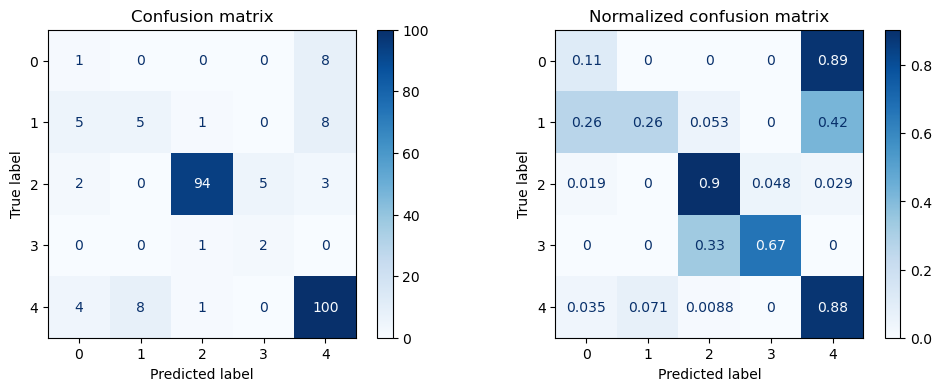

In [46]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

- GBM또한 정확도는 정말 높지만 정밀도와 재현율이 조금 낮다

#### xgb

In [47]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.22422	validation_1-mlogloss:1.23923
[1]	validation_0-mlogloss:1.02965	validation_1-mlogloss:1.06064
[2]	validation_0-mlogloss:0.89711	validation_1-mlogloss:0.92841
[3]	validation_0-mlogloss:0.79820	validation_1-mlogloss:0.84059
[4]	validation_0-mlogloss:0.72119	validation_1-mlogloss:0.76950
[5]	validation_0-mlogloss:0.66634	validation_1-mlogloss:0.71776
[6]	validation_0-mlogloss:0.62155	validation_1-mlogloss:0.67191
[7]	validation_0-mlogloss:0.58665	validation_1-mlogloss:0.63897
[8]	validation_0-mlogloss:0.55964	validation_1-mlogloss:0.61153
[9]	validation_0-mlogloss:0.53501	validation_1-mlogloss:0.58711
[10]	validation_0-mlogloss:0.51354	validation_1-mlogloss:0.56953
[11]	validation_0-mlogloss:0.49169	validation_1-mlogloss:0.54595
[12]	validation_0-mlogloss:0.47167	validation_1-mlogloss:0.52458
[13]	validation_0-mlogloss:0.45846	validation_1-mlogloss:0.51051
[14]	validation_0-mlogloss:0.44497	validation_1-mlogloss:0.49399
[15]	validation_0-mlogloss:0.42796	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-mlogloss:0.41653	validation_1-mlogloss:0.46283
[17]	validation_0-mlogloss:0.40516	validation_1-mlogloss:0.45144
[18]	validation_0-mlogloss:0.39742	validation_1-mlogloss:0.44145
[19]	validation_0-mlogloss:0.38518	validation_1-mlogloss:0.43043
[20]	validation_0-mlogloss:0.37324	validation_1-mlogloss:0.41554
[21]	validation_0-mlogloss:0.36331	validation_1-mlogloss:0.40424
[22]	validation_0-mlogloss:0.34990	validation_1-mlogloss:0.39129
[23]	validation_0-mlogloss:0.33937	validation_1-mlogloss:0.38033
[24]	validation_0-mlogloss:0.33110	validation_1-mlogloss:0.37008
[25]	validation_0-mlogloss:0.32203	validation_1-mlogloss:0.36111
[26]	validation_0-mlogloss:0.31258	validation_1-mlogloss:0.35337
[27]	validation_0-mlogloss:0.30788	validation_1-mlogloss:0.34889
[28]	validation_0-mlogloss:0.29756	validation_1-mlogloss:0.33421
[29]	validation_0-mlogloss:0.28939	validation_1-mlogloss:0.32350
[30]	validation_0-mlogloss:0.28111	validation_1-mlogloss:0.31486
[31]	validation_0-mloglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [49]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.845982,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.854464,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.852232,3
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.851339,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.853125,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.850893,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.849107,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.845982,9
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.843304,12
9,"{'learning_rate': 1, 'n_estimators': 50}",0.843750,11


In [50]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

오차 행렬
[[ 1  0  0  0  8]
 [ 3  4  1  0 11]
 [ 2  0 93  5  4]
 [ 0  0  1  2  0]
 [ 9 11  0  0 93]]
정확도: 0.7782, 정밀도: 0.4799, 재현율: 0.5411, F1: 0.4931
################################################################################


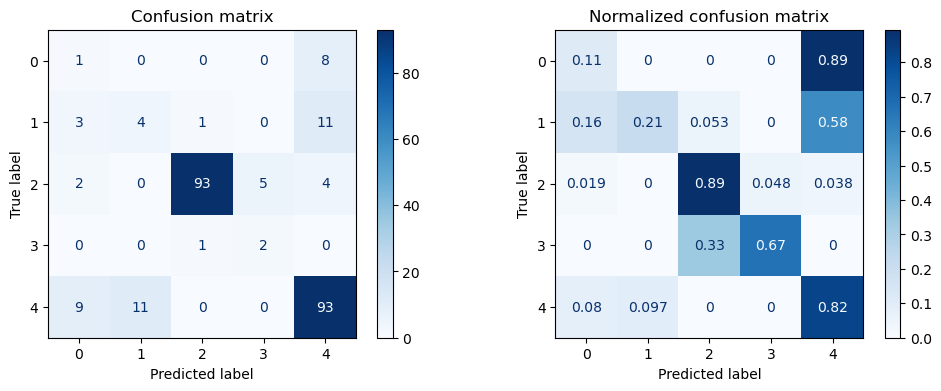

In [51]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

- GBM과 유사하게 정확도가 높고 정밀도와 재현율이 낮지만 전체적으로 GBM보다 낮은 수치이다

#### lgbm

In [52]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 4
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [53]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.841518,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.844196,6
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.845536,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.845982,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.845536,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.842857,8
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.844643,5
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.844196,6
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.845536,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.554911,10


In [54]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[ 1  0  0  0  8]
 [ 4  4  2  0  9]
 [ 2  2 95  4  1]
 [ 0  0  1  2  0]
 [ 4 11  1  0 97]]
정확도: 0.8024, 정밀도: 0.4925, 재현율: 0.5520, F1: 0.5107
################################################################################


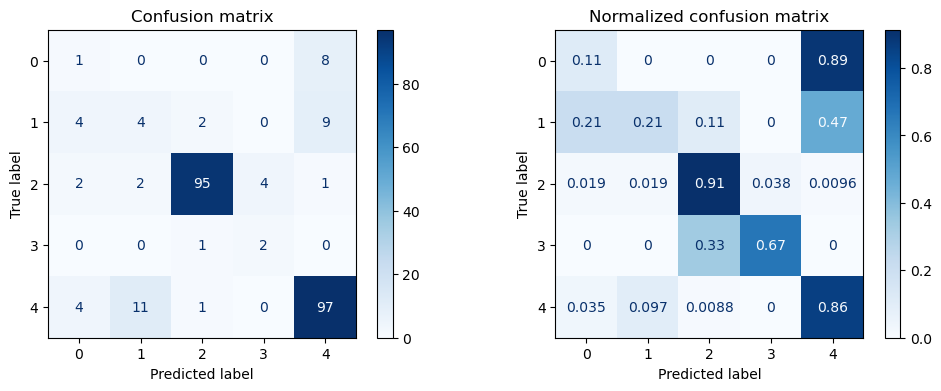

In [55]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

- lgbm은 정확도가 높고 재현율이 조금 준수한편이며 정밀도가 0.5가 안되는 모습

#### vc

In [56]:
from sklearn.ensemble import VotingClassifier

# vc = VotingClassifier(estimators=[('dtc', dtc),
#                                   ('rfc', rfc),
#                                   ('gbc', gbc),
#                                   ('xgb', xgb),
#                                   ('lgbm', lgbm),
#                                   ('ada', ada),
#                                   ('knn', knn_pipe)], 
#                                   voting='hard', 
#                                   n_jobs=-1)

# 전체적이게 soft가 더 높다
vc = VotingClassifier(estimators=[('dtc', dtc),
                                  ('rfc', rfc),
                                  ('g_svc', g_svc),
                                  ('gbc', gbc),
                                  ('xgb', xgb),
                                  ('lgbm', lgbm),
                                  ('ada', ada),
                                  ('knn', knn_pipe)], 
                                  voting='soft', 
                                  n_jobs=-1)

In [57]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=18,
                                                     min_samples_split=40)),
                             ('rfc',
                              RandomForestClassifier(max_depth=19,
                                                     min_samples_split=28)),
                             ('g_svc',
                              GridSearchCV(cv=3,
                                           estimator=Pipeline(steps=[('standard_scaler',
                                                                      StandardScaler()),
                                                                     ('svc',
                                                                      SVC(probability=True,
                                                                          verbose=True))]),
                                           n_jobs=-1,
                                           param_grid={'svc__C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  10...
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.5,
                                             n_estimators=50)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.7,
                                                 n_estimators=150)),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1, voting='soft')

오차 행렬
[[ 1  0  0  0  8]
 [ 4  4  1  0 10]
 [ 2  2 95  4  1]
 [ 0  0  1  2  0]
 [ 8  8  1  0 96]]
정확도: 0.7984, 정밀도: 0.4980, 재현율: 0.5503, F1: 0.5106
################################################################################


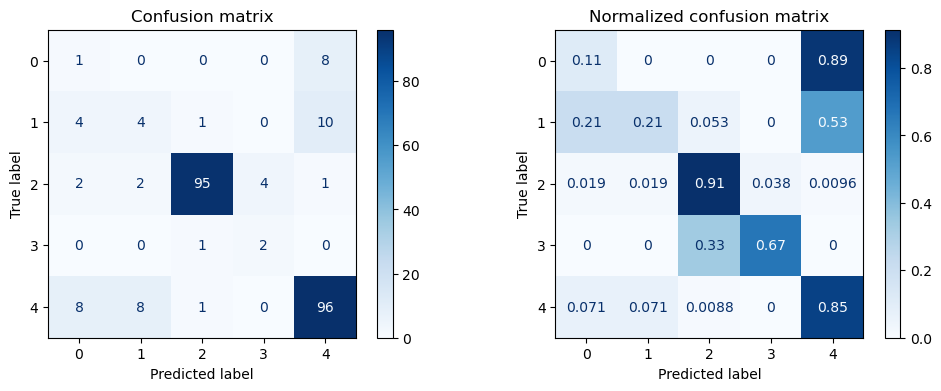

In [58]:
vc_prediction = vc.predict(X_test)
get_evaluation(y_test, vc_prediction, vc, X_test)

- 잘 안나온 모델들이 끼어있어서 그런지 vc또한 잘 나오진 않았다

In [59]:
from sklearn.ensemble import VotingClassifier

# 오차 행렬
# [[ 1  0  0  0  8]
#  [ 4  5  1  0  9]
#  [ 2  0 93  5  4]
#  [ 0  0  1  2  0]
#  [ 7 14  0  0 92]]
# 정확도: 0.7782, 정밀도: 0.4827, 재현율: 0.5499, F1: 0.4998
# vc = VotingClassifier(estimators=[('rfc', rfc),
#                                   ('gbc', gbc),
#                                   ('xgb', xgb),
#                                   ('lgbm', lgbm)], 
#                                   voting='hard', 
#                                   n_jobs=-1)

# 오차 행렬
# [[  1   0   0   0   8]
#  [  4   4   1   0  10]
#  [  2   2  93   5   2]
#  [  0   0   1   2   0]
#  [  5   7   1   0 100]]
# 정확도: 0.8065, 정밀도: 0.4958, 재현율: 0.5535, F1: 0.5067
vc = VotingClassifier(estimators=[('rfc', rfc),
                                  ('gbc', gbc),
                                  ('xgb', xgb),
                                  ('lgbm', lgbm)], 
                                  voting='soft', 
                                  n_jobs=-1)

In [60]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_depth=19,
                                                     min_samples_split=28)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_...
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.5,
                                             n_estimators=50))],
                 n_jobs=-1, voting='soft')

오차 행렬
[[ 1  0  0  0  8]
 [ 4  4  1  0 10]
 [ 2  2 93  5  2]
 [ 0  0  1  2  0]
 [ 5  8  1  0 99]]
정확도: 0.8024, 정밀도: 0.4911, 재현율: 0.5517, F1: 0.5042
################################################################################


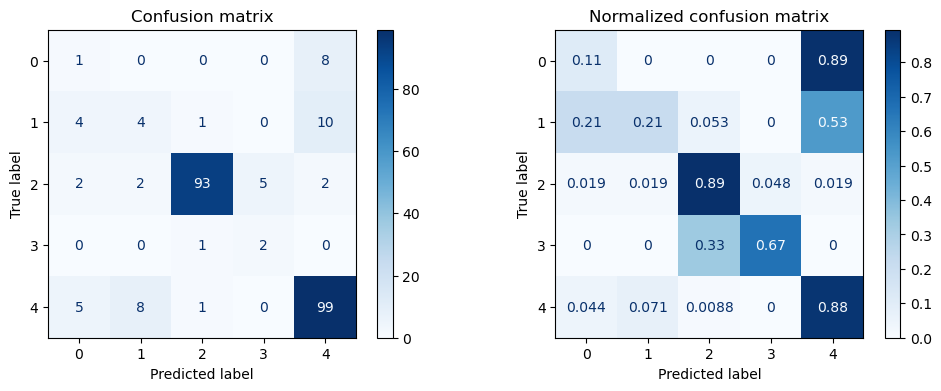

In [61]:
vc_prediction = vc.predict(X_test)
get_evaluation(y_test, vc_prediction, vc, X_test)

- 결과가 좋지않았던 모델들을 빼고 다시 보팅하였으나 그래도 큰 차이는 없었다

Model		Accuracy	Precision	Recall		F1 Score
dtc		0.6008		0.4486		0.5098		0.4351
svc		0.6492		0.4259		0.4920		0.4361
rfc		0.7419		0.4961		0.6449		0.5190
gbc		0.8145		0.5126		0.5659		0.5210
xgb		0.7782		0.4799		0.5411		0.4931
lgbm		0.8024		0.4925		0.5520		0.5107
ada		0.4234		0.2899		0.2745		0.2170
knn		0.5282		0.4022		0.4833		0.3689
vc		0.8024		0.4911		0.5517		0.5042


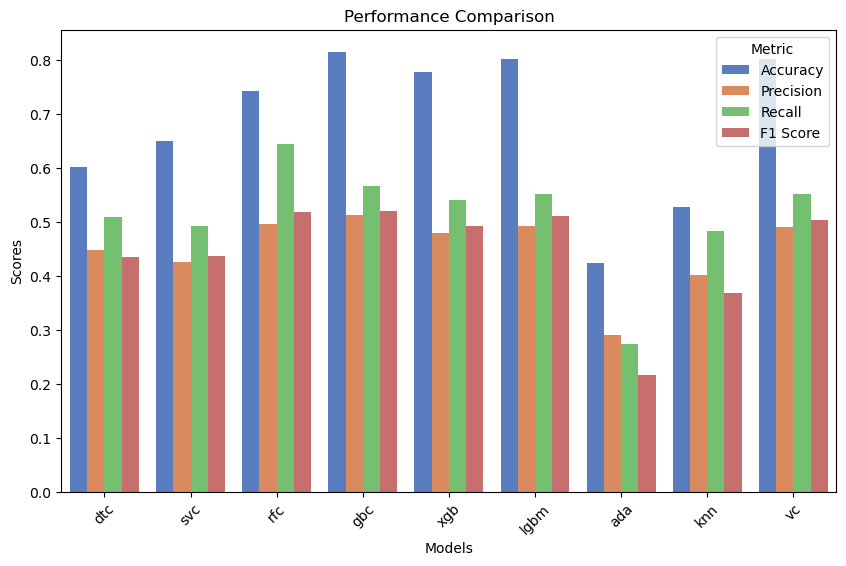

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['dtc', 'svc', 'rfc', 'gbc', 'xgb', 'lgbm', 'ada', 'knn', 'vc']

accuracies = [accuracy_score(y_test, dtc_prediction), accuracy_score(y_test, svc_prediction), accuracy_score(y_test, rfc_prediction),
              accuracy_score(y_test, gbc_prediction), accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction),
              accuracy_score(y_test, ada_prediction), accuracy_score(y_test, knn_prediction), accuracy_score(y_test, vc_prediction)]

precisions = [precision_score(y_test, dtc_prediction, average='macro'), precision_score(y_test, svc_prediction, average='macro'), precision_score(y_test, rfc_prediction, average='macro'),
              precision_score(y_test, gbc_prediction, average='macro'), precision_score(y_test, xgb_prediction, average='macro'), precision_score(y_test, lgbm_prediction, average='macro'),
              precision_score(y_test, ada_prediction, average='macro'), precision_score(y_test, knn_prediction, average='macro'), precision_score(y_test, vc_prediction, average='macro')]

recalls = [recall_score(y_test, dtc_prediction, average='macro'), recall_score(y_test, svc_prediction, average='macro'), recall_score(y_test, rfc_prediction, average='macro'),
           recall_score(y_test, gbc_prediction, average='macro'), recall_score(y_test, xgb_prediction, average='macro'), recall_score(y_test, lgbm_prediction, average='macro'),
           recall_score(y_test, ada_prediction, average='macro'), recall_score(y_test, knn_prediction, average='macro'), recall_score(y_test, vc_prediction, average='macro')]

f1_scores = [f1_score(y_test, dtc_prediction, average='macro'), f1_score(y_test, svc_prediction, average='macro'), f1_score(y_test, rfc_prediction, average='macro'),
             f1_score(y_test, gbc_prediction, average='macro'), f1_score(y_test, xgb_prediction, average='macro'), f1_score(y_test, lgbm_prediction, average='macro'),
             f1_score(y_test, ada_prediction, average='macro'), f1_score(y_test, knn_prediction, average='macro'), f1_score(y_test, vc_prediction, average='macro')]

# 성능 지표 출력
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{accuracies[i]:.4f}\t\t{precisions[i]:.4f}\t\t{recalls[i]:.4f}\t\t{f1_scores[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 9 + ['Precision'] * 9 + ['Recall'] * 9 + ['F1 Score'] * 9,
    'Score': accuracies + precisions + recalls + f1_scores
})

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='muted')
plt.title('Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

- 종합적이게 보았을 때 rfc와 gbc가 가장 괜찮아 보이며, ada의 경우엔 해당 데이터세트에 사용하기엔 적합하지 않은 모델인 것 같다
- gbc가 가장 적합한 모델인 것 같다.

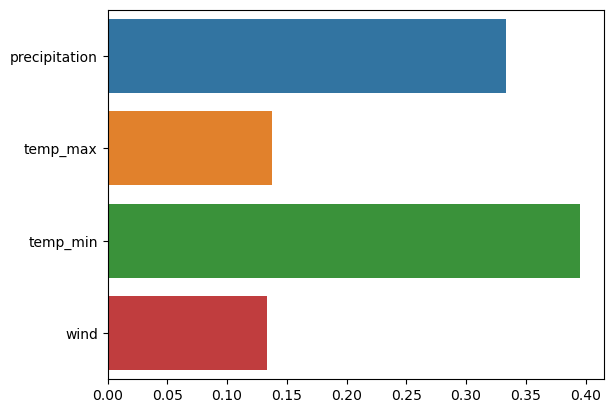

In [63]:
sns.barplot(x=gbc.feature_importances_, y=features.columns)
plt.show()

### 2 cycle
- 결과가 영 마음에 들지않아 전처리를 새롭게 한 후 다시 측정하기

In [64]:
import pandas as pd
w_df_origin = pd.read_csv('./datasets/weather.csv')
w_df = w_df_origin.copy()
w_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


array([[<Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'temp_max'}>],
       [<Axes: title={'center': 'temp_min'}>,
        <Axes: title={'center': 'wind'}>]], dtype=object)

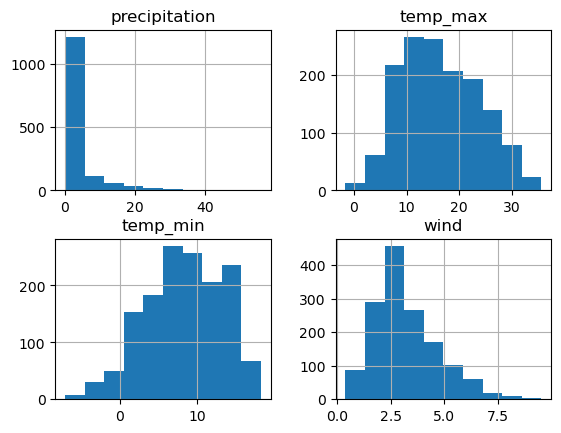

In [65]:
w_df.hist()

In [66]:
# 날짜는 필요없다고 판단하여 제거, presipitation은 한쪽으로 몰려있어 제거하기로 함
w_df = w_df.drop(labels=['date', 'precipitation'], axis=1)
w_df

,temp_max,temp_min,wind,weather
0,12.8,5.0,4.7,drizzle
1,10.6,2.8,4.5,rain
2,11.7,7.2,2.3,rain
3,12.2,5.6,4.7,rain
4,8.9,2.8,6.1,rain
...,...,...,...,...
1456,4.4,1.7,2.9,rain
1457,5.0,1.7,1.3,rain
1458,7.2,0.6,2.6,fog
1459,5.6,-1.0,3.4,sun


In [67]:
w_df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


- mean과 50%의 차이가 거의 나지 않아 이번엔 이상치 제거 없이 진행

In [68]:
from sklearn.preprocessing import LabelEncoder

# target 피쳐 인코딩
columns = ['weather']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    w_df[column] = encoder.fit_transform(w_df[column])
    encoders[column] = encoder.classes_.tolist()

In [69]:
w_df

,temp_max,temp_min,wind,weather
0,12.8,5.0,4.7,0
1,10.6,2.8,4.5,2
2,11.7,7.2,2.3,2
3,12.2,5.6,4.7,2
4,8.9,2.8,6.1,2
...,...,...,...,...
1456,4.4,1.7,2.9,2
1457,5.0,1.7,1.3,2
1458,7.2,0.6,2.6,1
1459,5.6,-1.0,3.4,4


In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = w_df.iloc[:, :-1], w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# target피쳐의 불균형을 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

weather
4    512
2    512
1    512
3    512
0    512
Name: count, dtype: int64

- target피쳐의 갯수가 차이가 많이 나지만 전체 갯수가 너무 적어 오버샘플링으로 일단 해보기

#### 1cycle에서 가장 성능이 괜찮았던 몇가지만 사용

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [73]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.732031,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.750000,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.741797,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.748047,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.745703,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.739062,8
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.747266,4
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.748047,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.741797,6
9,"{'learning_rate': 1, 'n_estimators': 50}",0.731250,11


In [74]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[ 0  1  4  0  6]
 [ 1  2  9  0  8]
 [ 3  6 87  5 28]
 [ 0  0  2  2  1]
 [ 7  7 25  5 84]]
정확도: 0.5973, 정밀도: 0.3276, 재현율: 0.3661, F1: 0.3370
################################################################################


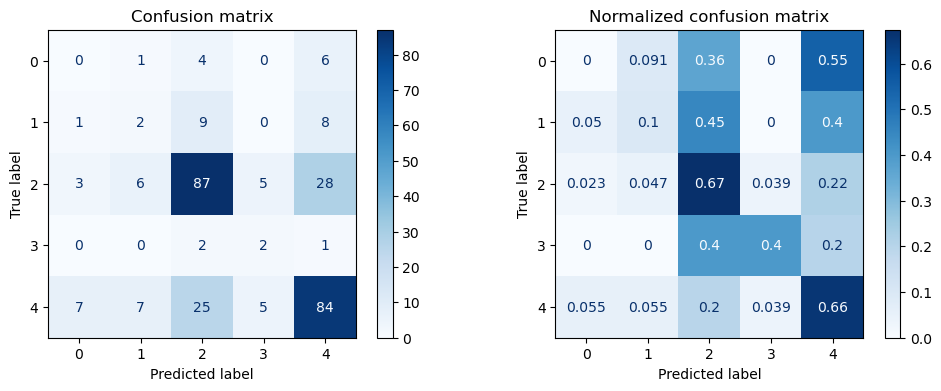

In [75]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

In [76]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.21797	validation_1-mlogloss:1.19238
[1]	validation_0-mlogloss:1.05067	validation_1-mlogloss:1.01905
[2]	validation_0-mlogloss:0.94896	validation_1-mlogloss:0.91597
[3]	validation_0-mlogloss:0.87665	validation_1-mlogloss:0.84862
[4]	validation_0-mlogloss:0.82500	validation_1-mlogloss:0.79268
[5]	validation_0-mlogloss:0.77547	validation_1-mlogloss:0.74868
[6]	validation_0-mlogloss:0.74220	validation_1-mlogloss:0.71106
[7]	validation_0-mlogloss:0.71569	validation_1-mlogloss:0.68932
[8]	validation_0-mlogloss:0.68672	validation_1-mlogloss:0.65730
[9]	validation_0-mlogloss:0.66300	validation_1-mlogloss:0.63292
[10]	validation_0-mlogloss:0.63638	validation_1-mlogloss:0.61052
[11]	validation_0-mlogloss:0.61516	validation_1-mlogloss:0.58486
[12]	validation_0-mlogloss:0.60060	validation_1-mlogloss:0.57242
[13]	validation_0-mlogloss:0.57477	validation_1-mlogloss:0.54129
[14]	validation_0-mlogloss:0.55491	validation_1-mlogloss:0.52296
[15]	validation_0-mlogloss:0.53723	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mlogloss:0.39459	validation_1-mlogloss:0.36450
[29]	validation_0-mlogloss:0.38740	validation_1-mlogloss:0.35584
[30]	validation_0-mlogloss:0.37702	validation_1-mlogloss:0.34625
[31]	validation_0-mlogloss:0.36898	validation_1-mlogloss:0.34053
[32]	validation_0-mlogloss:0.36228	validation_1-mlogloss:0.33459
[33]	validation_0-mlogloss:0.35748	validation_1-mlogloss:0.33097
[34]	validation_0-mlogloss:0.35018	validation_1-mlogloss:0.32097
[35]	validation_0-mlogloss:0.34258	validation_1-mlogloss:0.31326
[36]	validation_0-mlogloss:0.33682	validation_1-mlogloss:0.30862
[37]	validation_0-mlogloss:0.33238	validation_1-mlogloss:0.30324
[38]	validation_0-mlogloss:0.32386	validation_1-mlogloss:0.29225
[39]	validation_0-mlogloss:0.31509	validation_1-mlogloss:0.28445
[40]	validation_0-mlogloss:0.30824	validation_1-mlogloss:0.27867
[41]	validation_0-mlogloss:0.29990	validation_1-mlogloss:0.27067
[42]	validation_0-mlogloss:0.29338	validation_1-mlogloss:0.26610
[43]	validation_0-mloglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [78]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.761719,7
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.773047,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.771875,3
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.773828,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.766016,4
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.765234,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.765234,5
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.760156,9
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.760938,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.758203,12


In [79]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

오차 행렬
[[ 0  1  2  0  8]
 [ 0  3  9  0  8]
 [ 3  4 93  4 25]
 [ 0  0  3  1  1]
 [ 9  6 25  5 83]]
정확도: 0.6143, 정밀도: 0.3366, 재현율: 0.3439, F1: 0.3357
################################################################################


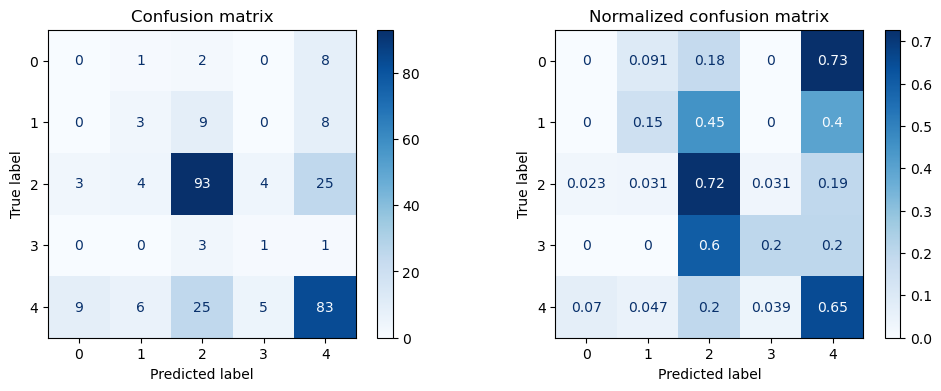

In [80]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [24, 25, 26], 
    'min_samples_split': [50, 51, 52]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [24, 25, 26],
                         'min_samples_split': [50, 51, 52]})

In [82]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 24, 'min_samples_split': 50}",0.691406,7
1,"{'max_depth': 24, 'min_samples_split': 51}",0.692187,5
2,"{'max_depth': 24, 'min_samples_split': 52}",0.690625,9
3,"{'max_depth': 25, 'min_samples_split': 50}",0.694922,2
4,"{'max_depth': 25, 'min_samples_split': 51}",0.691406,7
5,"{'max_depth': 25, 'min_samples_split': 52}",0.693359,4
6,"{'max_depth': 26, 'min_samples_split': 50}",0.695312,1
7,"{'max_depth': 26, 'min_samples_split': 51}",0.694141,3
8,"{'max_depth': 26, 'min_samples_split': 52}",0.692187,5


In [83]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[ 1  4  2  0  4]
 [ 2  5  7  1  5]
 [ 1 12 88  6 22]
 [ 0  1  2  2  0]
 [10 20 21 10 67]]
정확도: 0.5563, 정밀도: 0.3425, 재현율: 0.3893, F1: 0.3415
################################################################################


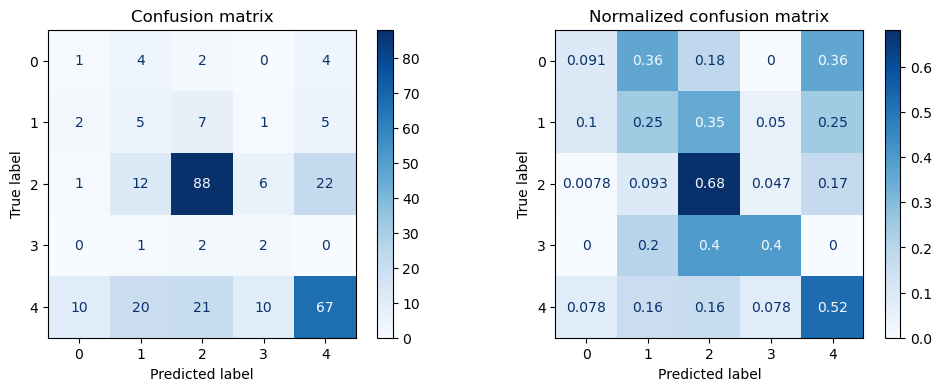

In [84]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

- 2cycle - 모든 수치가 훨씬 떨어져서 이상치 제거 없이 3cycle

### 3 cycle

In [85]:
import pandas as pd
w_df_origin = pd.read_csv('./datasets/weather.csv')
w_df = w_df_origin.copy()
w_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [86]:
# 날짜는 필요없다고 판단하여 제거
w_df = w_df.drop(labels=['date'], axis=1)
w_df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [87]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = w_df.iloc[:, :-1], w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# target피쳐의 불균형을 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

weather
sun        512
rain       512
fog        512
snow       512
drizzle    512
Name: count, dtype: int64

In [88]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [20, 21, 22], 
    'min_samples_split': [50, 51, 52]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22],
                         'min_samples_split': [50, 51, 52]})

In [89]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 20, 'min_samples_split': 50}",0.788281,8
1,"{'max_depth': 20, 'min_samples_split': 51}",0.788672,7
2,"{'max_depth': 20, 'min_samples_split': 52}",0.790234,5
3,"{'max_depth': 21, 'min_samples_split': 50}",0.793750,2
4,"{'max_depth': 21, 'min_samples_split': 51}",0.790625,4
5,"{'max_depth': 21, 'min_samples_split': 52}",0.792188,3
6,"{'max_depth': 22, 'min_samples_split': 50}",0.794922,1
7,"{'max_depth': 22, 'min_samples_split': 51}",0.789844,6
8,"{'max_depth': 22, 'min_samples_split': 52}",0.785937,9


In [90]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[  0   5   0   0   6]
 [  4   9   0   0   7]
 [  2   1 110  10   6]
 [  0   0   3   2   0]
 [ 12  23   0   0  93]]
정확도: 0.7304, 정밀도: 0.4415, 재현율: 0.4859, F1: 0.4459
################################################################################


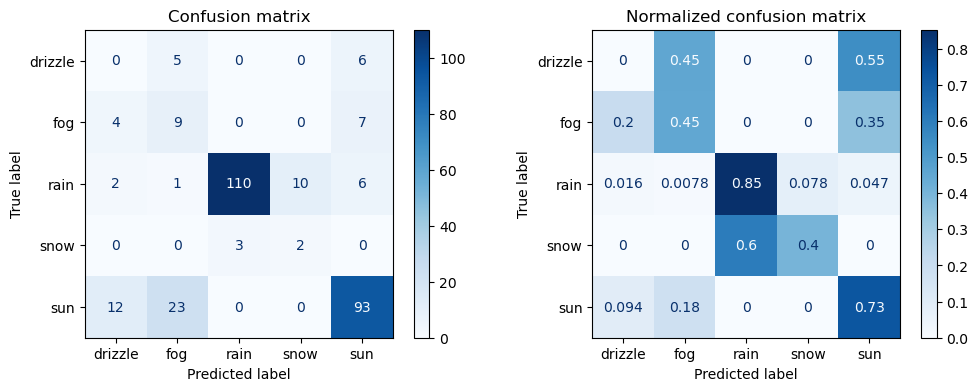

In [91]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [93]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.834375,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.844531,4
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.842969,5
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.847266,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.853125,1
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.839844,9
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.839063,10
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.848047,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.835938,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.840234,7


In [94]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[  0   1   1   0   9]
 [  2   4   1   0  13]
 [  0   0 115   4  10]
 [  0   0   2   3   0]
 [  5  14   2   0 107]]
정확도: 0.7816, 정밀도: 0.4719, 재현율: 0.5055, F1: 0.4853
################################################################################


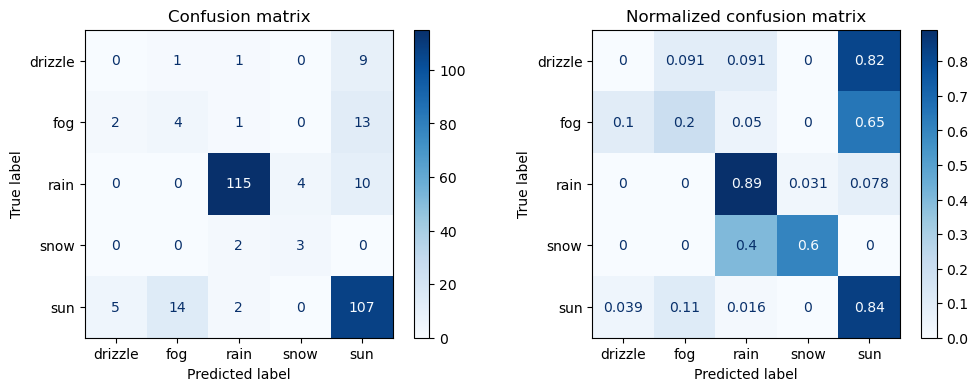

In [95]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

- 3 cycle도 똑같이 결과가 별로였다

#### 결론
- 이상치 제거와 오버 샘플링 후 gbc가 가장 적합한 모델이었다